# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

The dataset consists of customer profiles generated from CDR-level data, focusing on the last 7 days of activity for each MSISDN. It comprises approximately 1 million non-fraudulent and 189 fraudulent profiles. The dataset is imbalanced, with a significantly higher number of non-fraudulent cases. Each profile includes multiple features derived from CDR data to characterize customer behavior.


In [3]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('sim_data_sample_1M.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 1000189
Number of features: 28
Example data:
   unique_number  moc  dist_moc  onnet_moc  offnet_moc  int_moc  mtc  \
0              2    0         0          0           0        0    4   
1              6    0         0          0           0        0    1   
2             11    0         0          0           0        0    0   
3             23    1         1          0           1        0    2   
4             38    0         0          0           0        0    0   

   dist_mtc  onnet_mtc  offnet_mtc  ...  b_ratio  avg_duration_mtc  \
0         4          0           0  ...      0.0             13.25   
1         1          0           0  ...      0.0            212.00   
2         0          0           0  ...      0.0              0.00   
3         1          0           0  ...      1.0            512.00   
4         0          0           0  ...      0.0              0.00   

   avg_duration  total_duration  lac  cell  min_lac  max_lac  evt_volume  \
0     

## Handling Missing Values

The dataset contains missing values in the columns 'min_lac', 'max_lac', and 'total_duration'. Given that 'min_lac' and 'max_lac' are MSISDN-specific features and their presense can create bais, these columns will be dropped. To handle missing values in 'total_duration', which represent profiles with no generated calls, they will be replaced with zero.


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


unique_number            0
moc                      0
dist_moc                 0
onnet_moc                0
offnet_moc               0
int_moc                  0
mtc                      0
dist_mtc                 0
onnet_mtc                0
offnet_mtc               0
int_mtc                  0
smsmo                    0
smsmt                    0
imei                     0
max_onnet_moc            0
max_offnet_moc           0
max_int_moc              0
max_mtc                  0
b_ratio                  0
avg_duration_mtc         0
avg_duration             0
total_duration      409862
lac                      0
cell                     0
min_lac              65255
max_lac              65255
evt_volume               0
is_fraud                 0
dtype: int64

In [5]:
# Handling missing values
df.fillna(0, inplace=True)
df.drop(['unique_number', 'min_lac', 'max_lac'], axis=1, inplace=True)

## Feature Distributions


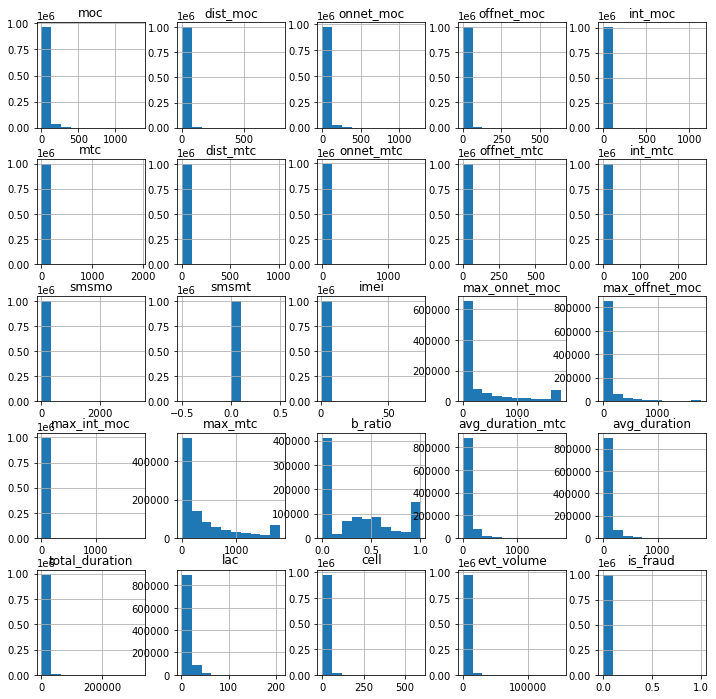

In [6]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

There is a imbalance class problem


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

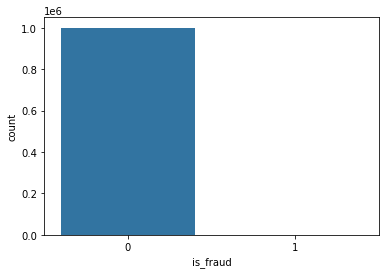

In [7]:
sns.countplot(x='is_fraud', data=df)



## Correlations

B-Ratio, MTC and int_moc has correlation with the target column


<AxesSubplot:>

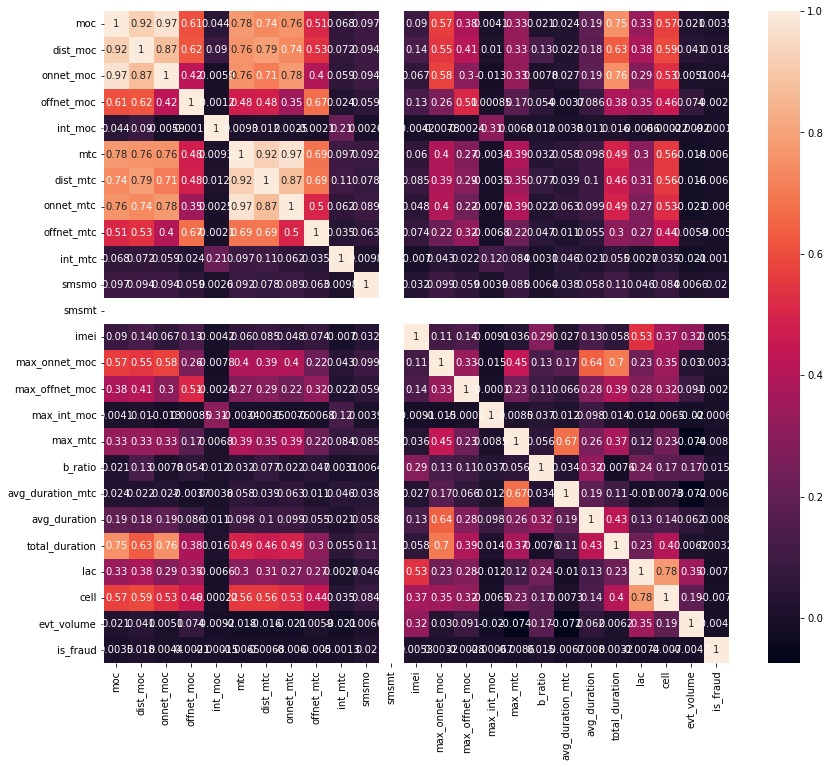

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True)
